In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import mediapipe as mp

## keypoints using mp holistic

In [2]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [4]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [5]:
cap=cv2.VideoCapture(0)
holistic=mp_holistic.Holistic()
while cap.isOpened():
    ret,frame=cap.read()

    image,results=mediapipe_detection(frame,holistic)

    draw_landmarks(image,results)
    
    cv2.imshow('OpenCV Feed',image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

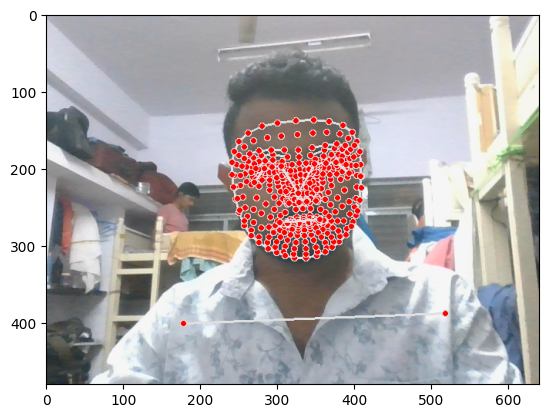

In [6]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [7]:
results.pose_landmarks

landmark {
  x: 0.5119668245315552
  y: 0.48483309149742126
  z: -0.9455940127372742
  visibility: 0.9999066591262817
}
landmark {
  x: 0.5443214178085327
  y: 0.4049205780029297
  z: -0.9058569073677063
  visibility: 0.999753475189209
}
landmark {
  x: 0.5671941041946411
  y: 0.40265893936157227
  z: -0.9056720733642578
  visibility: 0.999792754650116
}
landmark {
  x: 0.5875959992408752
  y: 0.4012053906917572
  z: -0.9056957960128784
  visibility: 0.9997158646583557
}
landmark {
  x: 0.4776191711425781
  y: 0.41187915205955505
  z: -0.8955540657043457
  visibility: 0.9997994899749756
}
landmark {
  x: 0.45873111486434937
  y: 0.41448530554771423
  z: -0.8946703672409058
  visibility: 0.9998369216918945
}
landmark {
  x: 0.4427829384803772
  y: 0.418641060590744
  z: -0.8949915766716003
  visibility: 0.9998205304145813
}
landmark {
  x: 0.6146254539489746
  y: 0.43062832951545715
  z: -0.5851005911827087
  visibility: 0.9997591972351074
}
landmark {
  x: 0.4227046072483063
  y: 0.455

## Extract Keypoint Values

In [8]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [9]:
face

array([ 0.52267092,  0.54898912, -0.03002587, ...,  0.59924579,
        0.39663702,  0.01608576])

In [10]:
pose.shape

(132,)

In [11]:
def extract_keypoints(results,p=True,l=True,r=True,f=True):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks and p else np.zeros(132)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks and l else np.zeros(63)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks and r else np.zeros(63)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks and f else np.zeros(1404)
    return np.concatenate([pose,face,lh,rh])

In [12]:
result_test=extract_keypoints(results)
np.save('0',result_test)

In [13]:
pose.shape[0]+face.shape[0]+lh.shape[0]+rh.shape[0]

1662

## Setup Folders for Collection

In [15]:
# Path for exported data, numpy arrays
DATA_PATH=os.path.join('MP_Data')

# Actions that we try to detect
actions=np.array(['Hello','ILoveYou','Thanks'])

# 30 videos worth of data
no_sequences=30

# videos are going to be 30 frames in length
sequences_length=30

In [16]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

## Collect Keypoint Values for Training and Testing

In [17]:
cap=cv2.VideoCapture(0)
holistic=mp_holistic.Holistic()
for action in actions:
    for sequence in range(no_sequences):
        for frame_num in range(sequences_length):

            ret,frame=cap.read()

            image,results=mediapipe_detection(frame,holistic)

            draw_landmarks(image,results)
            cv2.putText(image,f'{action}:{sequence}:{frame_num}',(40,40),cv2.FONT_HERSHEY_TRIPLEX,1,(0,0,0),1)
            if frame_num==0:
                # cv2.putText(image,'STARTING COLLECTION',(120,200),cv2.FONT_HERSHEY_TRIPLEX,1,(0,255,0),1,cv2.LINE_AA)
                # cv2.putText(image,'STARTING COLLECTION for {} Video number {}'.format(action,sequence),(120,200),cv2.FONT_HERSHEY_TRIPLEX,1,(0,0,255),1,cv2.LINE_AA)
                cv2.waitKey(500)
            else:
                # cv2.putText(image,'STARTING COLLECTION for {} Video number {}'.format(action,sequence),(120,200),cv2.FONT_HERSHEY_TRIPLEX,1,(0,0,255),1,cv2.LINE_AA)
                pass
                
            keypoints=extract_keypoints(results)
            npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
            np.save(npy_path,keypoints)
            cv2.imshow('OpenCV Feed',image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()

## Preprocess Data and Create Labels and Features

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
label_map={label:num for num,label in enumerate(actions)}
label_map

{'Hello': 0, 'ILoveYou': 1, 'Thanks': 2}

In [20]:
sequences,labels=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequences_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),'{}.npy'.format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
np.array(sequences).shape

(90, 30, 1662)

In [22]:
np.array(labels).shape

(90,)

In [23]:
x=np.array(sequences)

In [24]:
y=to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

## Build and Train LSTM Neural Network

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [27]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir)

In [28]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [29]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [39]:
model.fit(x_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 0s 99ms/step - loss: 1.0965 - categorical_accuracy: 0.3412
Epoch 2/1000
3/3 [==============================] - 0s 108ms/step - loss: 1.0947 - categorical_accuracy: 0.3412
Epoch 3/1000
3/3 [==============================] - 0s 107ms/step - loss: 1.0949 - categorical_accuracy: 0.4235
Epoch 4/1000
3/3 [==============================] - 0s 100ms/step - loss: 1.0988 - categorical_accuracy: 0.3412
Epoch 5/1000
3/3 [==============================] - 0s 109ms/step - loss: 1.0977 - categorical_accuracy: 0.3529
Epoch 6/1000
3/3 [==============================] - 0s 122ms/step - loss: 1.0945 - categorical_accuracy: 0.4824
Epoch 7/1000
3/3 [==============================] - 0s 104ms/step - loss: 1.0977 - categorical_accuracy: 0.2824
Epoch 8/1000
3/3 [==============================] - 0s 110ms/step - loss: 1.0954 - categorical_accuracy: 0.3647
Epoch 9/1000
3/3 [==============================] - 0s 119ms/step - loss: 1.0947 - categorical_accuracy: 

KeyboardInterrupt: 

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

## Make Predictions

In [41]:
res=model.predict(x_test)
res

1/1 [==============================] - 0s 139ms/step


array([[0.32376444, 0.32523876, 0.35099682],
       [0.34942517, 0.31594557, 0.3346292 ],
       [0.33962566, 0.32412747, 0.3362469 ],
       [0.33901945, 0.3257906 , 0.3351899 ],
       [0.33910537, 0.32540613, 0.33548853]], dtype=float32)

In [42]:
actions[np.argmax(res[0])]

'Thanks'

## Save Weights

In [43]:
model.save('action.h5')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation

In [44]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [45]:
yTrue=np.argmax(y_test,axis=1).tolist()
yHat=np.argmax(res,axis=1).tolist()

In [46]:
multilabel_confusion_matrix(yTrue,yHat)

array([[[1, 3],
        [0, 1]],

       [[2, 0],
        [3, 0]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [47]:
accuracy_score(yTrue,yHat)

0.4

## Test in Real time

In [48]:
sequence=[]
sentence=[]
threshold=0.4

cap=cv2.VideoCapture(0)
holistic=mp_holistic.Holistic()
while cap.isOpened():
    ret,frame=cap.read()

    image,results=mediapipe_detection(frame,holistic)

    draw_landmarks(image,results)

    keypoints=extract_keypoints(results)
    sequence.append(keypoints)
    sequence=sequence[-30:]

    if len(sequence)==30:
        res=model.predict(np.expand_dims(sequence, axis=0))[0]
        a=np.argmax(res)
        if a<=threshold:
            sequence.pop()
            res=np.zeros(len(res))

    
    # # if np.unique(predictions[-10:])[0]==np.argmax(res): 
    # if res[np.argmax(res).any()] > threshold: 
        
    #     if len(sentence) > 0: 
    #         if actions[np.argmax(res).any()] != sentence[-1]:
    #             sentence.append(actions[np.argmax(res).any()])
    #     else:
    #         sentence.append(actions[np.argmax(res).any()])

    # if len(sentence) > 5: 
    #     sentence = sentence[-5:]

    # cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
    # cv2.putText(image, ' '.join(sentence), (3,30), 
    #                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    # a=actions[np.argmax(res)]
    cv2.putText(image,f'{res}',(40,40),cv2.FONT_HERSHEY_TRIPLEX,1,(0,0,0),1)

    
    cv2.imshow('OpenCV Feed',image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 33ms/step


In [84]:
cap.release()
cv2.destroyAllWindows()